In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from wordcloud import STOPWORDS, WordCloud

#### Import data into Python environment.

In [2]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


#### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [5]:
df.Date = pd.to_datetime(df.Date)
dates = df.groupby(['Date'])['Ticket #'].count()
daily = pd.DataFrame(dates).reset_index()
daily

,Date,Ticket #
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


<AxesSubplot: xlabel='Date'>

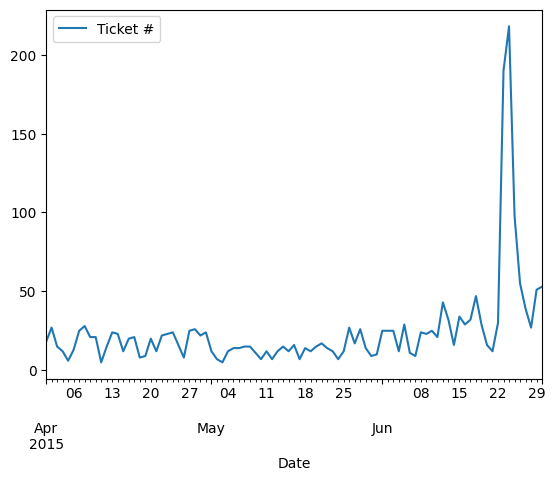

In [6]:
daily.plot(x='Date',y='Ticket #',kind='line')

In [7]:
df['Month'] = df['Date'].dt.month_name()
month = df.groupby('Month')['Ticket #'].count()
month = pd.DataFrame(month).reset_index()
month

,Month,Ticket #
0,April,545
1,June,1280
2,May,399


<AxesSubplot: xlabel='Month'>

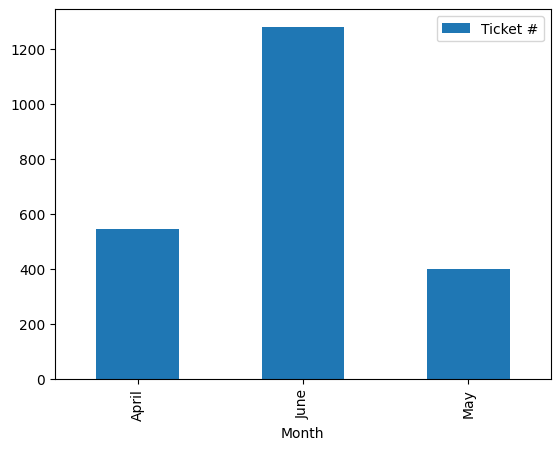

In [8]:
month.plot(x='Month',y='Ticket #',kind='bar')

#### Provide a table with the frequency of complaint types.

In [9]:
df['Customer Complaint'].str.lower().value_counts()

comcast                                                            102
comcast data cap                                                    30
comcast internet                                                    29
comcast data caps                                                   21
comcast billing                                                     18
                                                                  ... 
monthly data caps                                                    1
comcast/xfinity poor service, fraudulent billing and collection      1
lost emails/billing                                                  1
improper billing and non resolution of issues                        1
comcast, ypsilanti mi internet speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [10]:
common_complaints = df['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()
list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')
for word in list_stops:
 STOPWORDS.add(word)

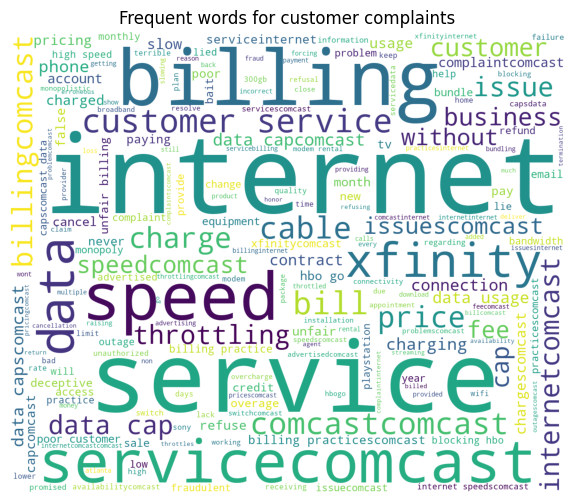

In [11]:
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000).generate(common_complaints)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()

#### Which complaint types are maximum i.e., around internet, network issues, or across any other domains

#### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [12]:
df['NewStatus'] = ['Open' if st=='Open' or st=='Pending' else 'Closed' for st in df.Status]
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,NewStatus
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,April,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June,Closed
2221,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,June,Closed
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June,Closed


#### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [13]:
state_complain = df.groupby(['State','NewStatus']).size().unstack()
state_complain

NewStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


<AxesSubplot: ylabel='State'>

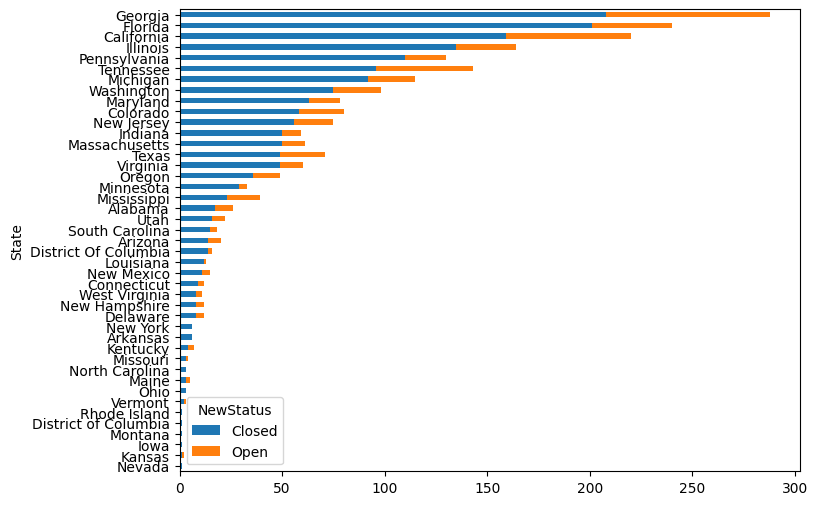

In [14]:
state_complain.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(8,6), stacked=True)

#### Which state has the maximum complaints

In [15]:
df.groupby('State').size().sort_values(ascending=False)[:1]

State
Georgia    288
dtype: int64

#### Which state has the highest percentage of unresolved complaints

In [16]:
state_complain['perc_unresolved_complaints'] = state_complain.Open/state_complain.Open.sum()*100
state_complain.sort_values('perc_unresolved_complaints',ascending=False)[:1]

NewStatus,Closed,Open,perc_unresolved_complaints
State,,,
Georgia,208.0,80.0,15.473888


#### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [17]:
complaints_resolved = df.groupby(['Received Via','NewStatus']).size().unstack()
complaints_resolved['resolved'] = complaints_resolved.Closed/complaints_resolved.Closed.sum()*100
complaints_resolved.resolved

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64